# Pymaceuticals Inc.
---

### Analysis

- There is a positive correlation between the size in weight of a mouse and the size of the tumor volume.
- Most mice were treated with either Capomulin or Ramicane.
- Infubinol was the only drug analyzed that had an outlier
- Capomulin had a smaller variance in final tumor volume than the other three drugs analyzed.
- Ceftamin had a larger variance in final tumor volume than the other three drugs analyzed.
- Propriva wsa the least frequently used drug in the study. 
- There was close to an equal divide between male and female test subjects.

In [186]:
%matplotlib notebook
%matplotlib inline


# Dependencies and Setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="outer")



# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [187]:
# Checking the number of mice.
mice_data = combined_data["Mouse ID"].value_counts()
number_of_mice = len(mice_data)
number_of_mice



249

In [188]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_dupli_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
mice_dupli_id



array(['g989'], dtype=object)

In [189]:
# Optional: Get all the data for the duplicate mouse ID. 
total_mice_dupli_id = combined_data.loc[combined_data["Mouse ID"] =="g989", :]
total_mice_dupli_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [190]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data[combined_data['Mouse ID'].isin(mice_dupli_id)==False]
clean_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [191]:
# Checking the number of mice in the clean DataFrame.
number_of_clean_mice = clean_combined_data["Mouse ID"].nunique()
number_of_clean_mice 


248

## Summary Statistics

In [192]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume


mean = clean_combined_data['Tumor Volume (mm3)'].groupby(clean_combined_data['Drug Regimen']).mean()
median = clean_combined_data['Tumor Volume (mm3)'].groupby(clean_combined_data['Drug Regimen']).median()
var = clean_combined_data['Tumor Volume (mm3)'].groupby(clean_combined_data['Drug Regimen']).var()
std = clean_combined_data['Tumor Volume (mm3)'].groupby(clean_combined_data['Drug Regimen']).std()
sem = clean_combined_data['Tumor Volume (mm3)'].groupby(clean_combined_data['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean":mean, 
                            "Median":median, 
                           "Variance":var, 
                           "Standard Deviation":std, 
                           "SEM":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [193]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_stat =  clean_combined_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_summary_stat


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [194]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
mice_count = clean_combined_data["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

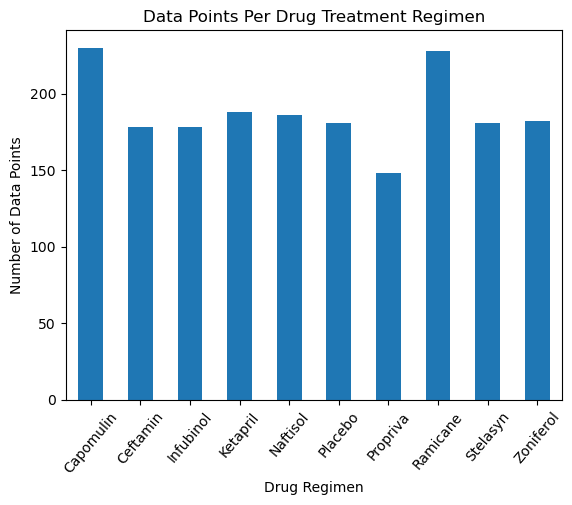

In [195]:
mice_count = clean_combined_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
forpanbar = pd.DataFrame(mice_count)

also = forpanbar.plot.bar(legend=False,rot=50)
also
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")
plt.savefig('barplot1')

In [196]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#  Create an array that contains the number of mice each drug regimen has

mice_list =(clean_combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

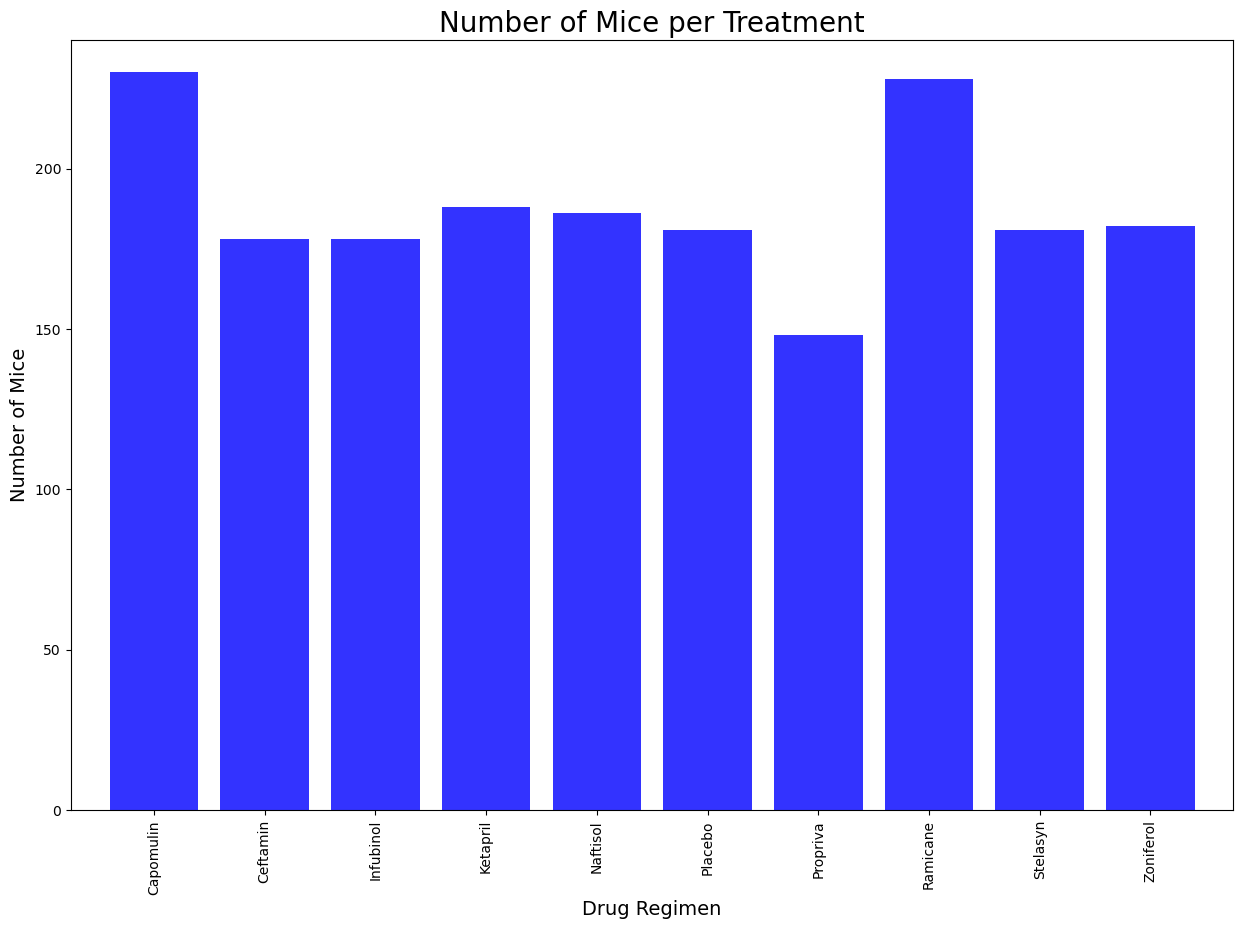

In [197]:
x_axis = np.arange(len(mice_count))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

plt.savefig('barplot1')


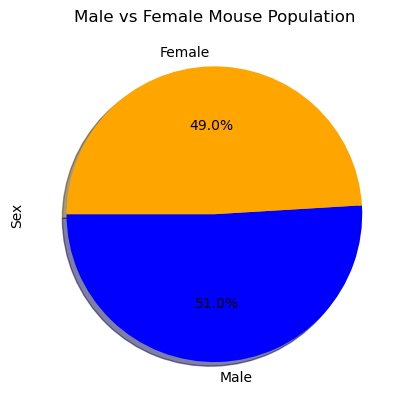

In [198]:
# Assuming we want to plot the distribution of male and female mice
gender_data = clean_combined_data['Sex'].value_counts()
sizes = gender_data.values
newlist = gender_data.index

plt.pie(sizes, labels=newlist, colors=['blue', 'orange'],
    autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.savefig('piechart1')


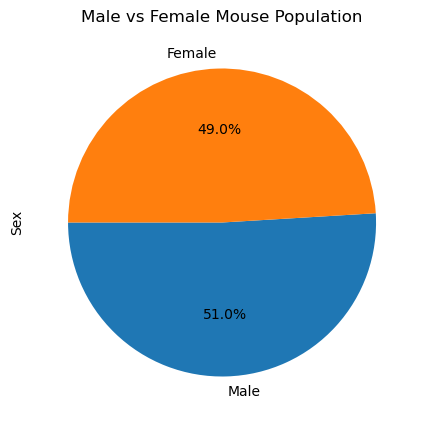

In [199]:
# Define bygender
bygender_data = clean_combined_data['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using pyplot
bygender = bygender_data.plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('piechart2')
plt.show()

## Quartiles, Outliers and Boxplots

In [200]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Ceftamin", :]

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [201]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [202]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
mouse_ids = list(clean_combined_data["Mouse ID"].unique())
max_times = []
for mouse in mouse_ids:
    maxidx = clean_combined_data.loc[clean_combined_data["Mouse ID"]==mouse,:]
    if not maxidx.empty:  # Check if the DataFrame is not empty
        max_times.append(maxidx["Timepoint"].idxmax())
max_times_df = pd.DataFrame([clean_combined_data.iloc[i,[1,2,7]] if i < len(clean_combined_data) else None for i in max_times], columns=["Mouse ID", "Timepoint", "Final Tumor Vol"])
max_times_df = max_times_df.dropna()  # Drop the None rows
max_times_df


TypeError: object of type 'NoneType' has no len()

In [204]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []
upperq = []
lowerq = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in combined_data.iterrows():
    if row["Drug Regimen"] == 'treatments'[0]:
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
#created a data frame with the tumor data of the drugs listed.
# Check the length of the lists
len_tumor_cap = len(tumor_cap)
len_tumor_ram = len(tumor_ram)
len_tumor_inf = len(tumor_inf)
len_tumor_cef = len(tumor_cef)

# If they are not of the same length, fill the shorter lists with None or any other value
if len_tumor_cap != len_tumor_ram or len_tumor_cap != len_tumor_inf or len_tumor_cap != len_tumor_cef:
    max_len = max(len_tumor_cap, len_tumor_ram, len_tumor_inf, len_tumor_cef)
    if len_tumor_cap < max_len:
        tumor_cap.extend([None]*(max_len-len_tumor_cap))
    if len_tumor_ram < max_len:
        tumor_ram.extend([None]*(max_len-len_tumor_ram))
    if len_tumor_inf < max_len:
        tumor_inf.extend([None]*(max_len-len_tumor_inf))
    if len_tumor_cef < max_len:
        tumor_cef.extend([None]*(max_len-len_tumor_cef))

# Now create the DataFrame
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })
    
# Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
# drug_df2 = pd.merge(drug_df_min, drug_df_max)
drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,None,45.000000,45.000000,45.000000
1,None,38.825898,48.508468,46.795257
2,None,35.014271,51.852437,47.371343
3,None,34.223992,52.777870,49.734404
4,None,32.997729,55.173336,50.513437
...,...,...,...,...
223,None,43.166373,NaN,NaN
224,None,45.000000,NaN,NaN
225,None,45.877545,NaN,NaN
226,None,46.378092,NaN,NaN


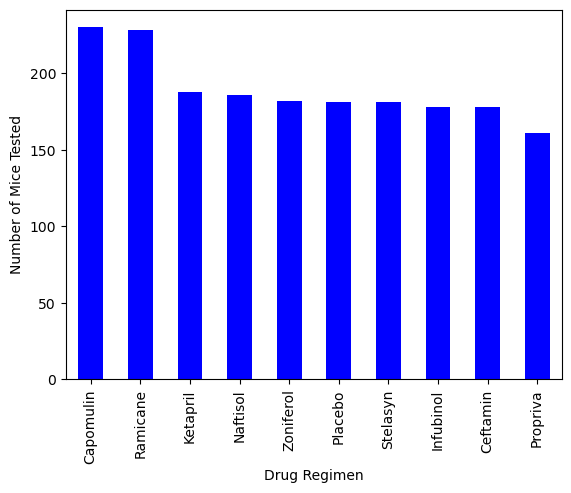

In [205]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
mice_and_drugs = combined_data[["Drug Regimen","Timepoint"]]


#find count per drug
mice_per_drug = mice_and_drugs["Drug Regimen"].value_counts()
mice_per_drug



#Use DataFrame.plot() in order to create a bar chart of the data
mice_per_drug.plot(kind="bar",color = "b",
                  xlabel="Drug Regimen",
                  ylabel="Number of Mice Tested")

plt.show()

/var/folders/cy/68jk8wdj3hn29zqvtz90hgfh0000gn/T/ipykernel_16156/2151561689.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(treatments)


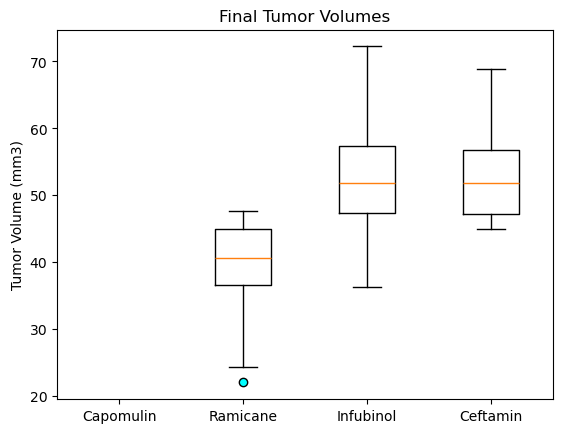

In [206]:
# Define tumor_vol_data
tumor_vol_data = [tumor_cap, tumor_ram, tumor_inf, tumor_cef]

# Filter out None values from each list in tumor_vol_data
tumor_vol_data = [[vol for vol in tumor_list if vol is not None] for tumor_list in tumor_vol_data]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
outlier = dict(markerfacecolor='aqua')
bp = ax1.boxplot(tumor_vol_data, flierprops=outlier)
plt.show()

## Line and Scatter Plots

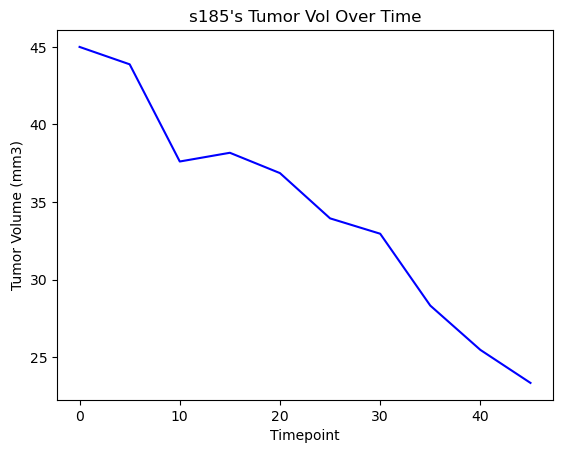

In [207]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_combined_data[clean_combined_data["Drug Regimen"]=="Capomulin"]
if not capomulin_data.empty:
    capomulin_mouse = capomulin_data.iloc[0]
    mouse_data = clean_combined_data[clean_combined_data["Mouse ID"]==capomulin_mouse["Mouse ID"]]
    fig2, ax2 = plt.subplots()
    ax2.set_title(f"{capomulin_mouse['Mouse ID']}'s Tumor Vol Over Time")
    ax2.set_ylabel('Tumor Volume (mm3)')
    ax2.set_xlabel('Timepoint')
    ax2.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color="blue")
    plt.show()
else:
    print("No data for mice treated with Capomulin")


In [208]:
# Assuming cap_regime is a DataFrame filtered from the original DataFrame where 'Drug Regimen' is 'Capomulin'
cap_regime = combined_data[combined_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = cap_regime['Tumor Volume (mm3)'].mean()
print(average_tumor_volume)


40.675741141


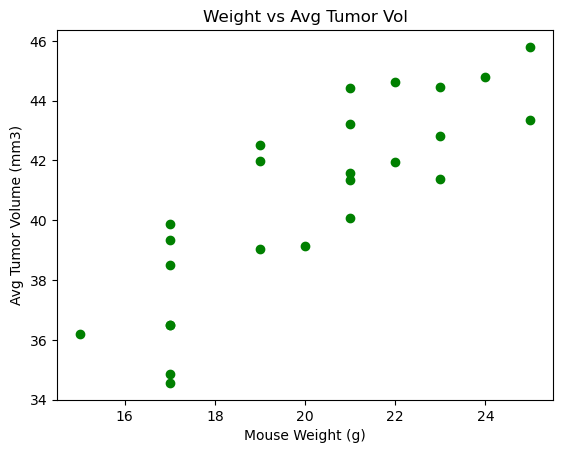

In [209]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_regime = clean_combined_data.loc[clean_combined_data["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(cap_regime["Weight (g)"],cap_regime["Tumor Volume (mm3)"],color="g")
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

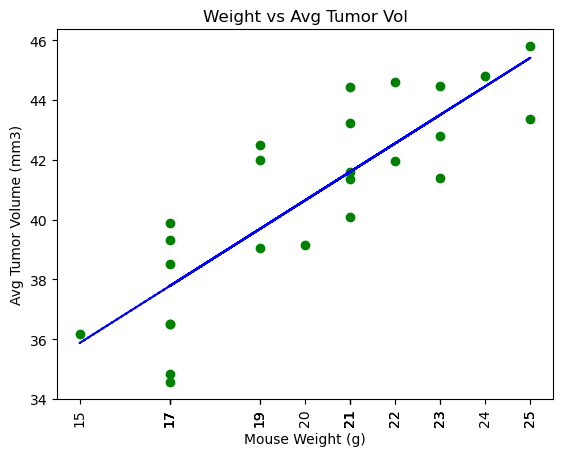

In [210]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capo_slope, capo_int, capo_r, capo_p, capo_std_err = st.linregress(cap_regime["Weight (g)"],cap_regime["Tumor Volume (mm3)"])
capo_fit = capo_slope * cap_regime["Weight (g)"] + capo_int
plt.scatter(cap_regime["Weight (g)"],cap_regime["Tumor Volume (mm3)"],color="g")
plt.plot(cap_regime["Weight (g)"],capo_fit,"--",color="b")
plt.xticks(cap_regime["Weight (g)"], rotation=90)
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()